In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# specify the directory where csv files are located
directory = "../ModelResults2"
# Load the average accuracies into a DataFrame
average_accuracies_df = pd.read_csv('../ModelResults2/average_accuracies.csv')

# create a dictionary to store all dataframes
dataframes = {}

# loop through all csv files
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # read the csv file into a pandas dataframe
        df = pd.read_csv(os.path.join(directory, filename))
        
        # get the name of the model from the filename
        model_name = filename.split('_')[1].split('.')[0]
        
        # add the dataframe to the dictionary
        dataframes[model_name] = df

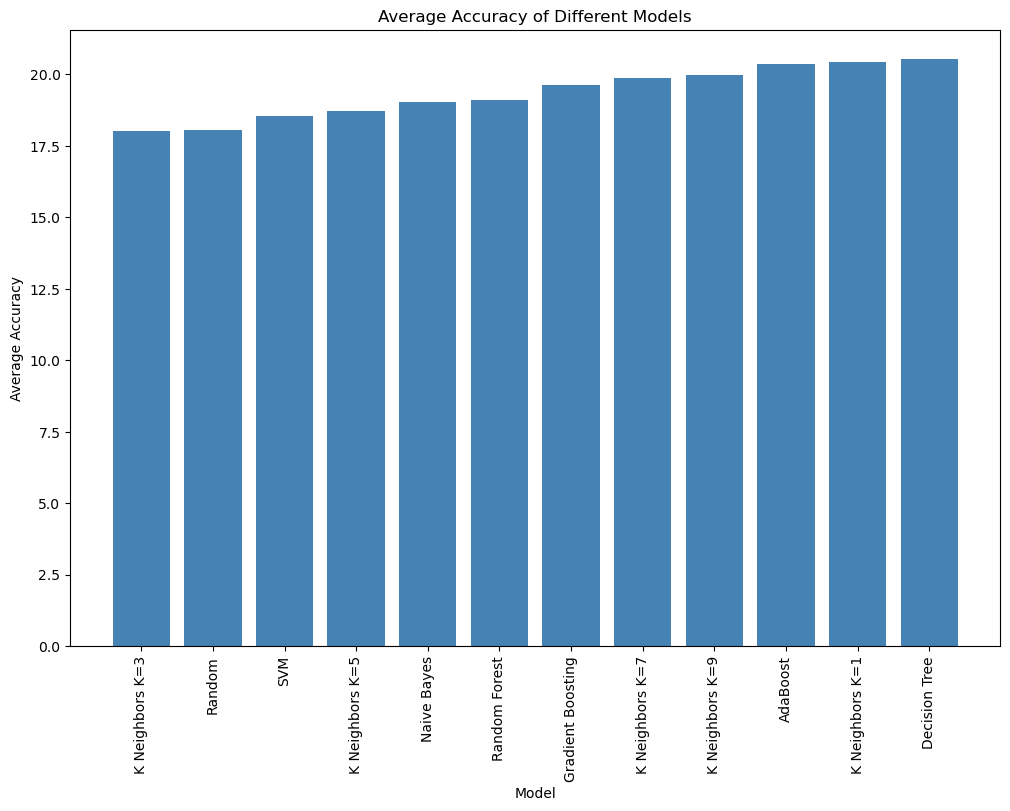

In [10]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Sort dataframe by 'AverageAccuracy' in descending order
ordered_average_accuracies_df = average_accuracies_df.sort_values(by='AverageAccuracy', ascending=False)


# Create a bar plot with model names on the x-axis and average accuracy on the y-axis
plt.bar(ordered_average_accuracies_df['Model'], ordered_average_accuracies_df['AverageAccuracy'], color='steelblue')

# Set the title and labels
plt.title('Average Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


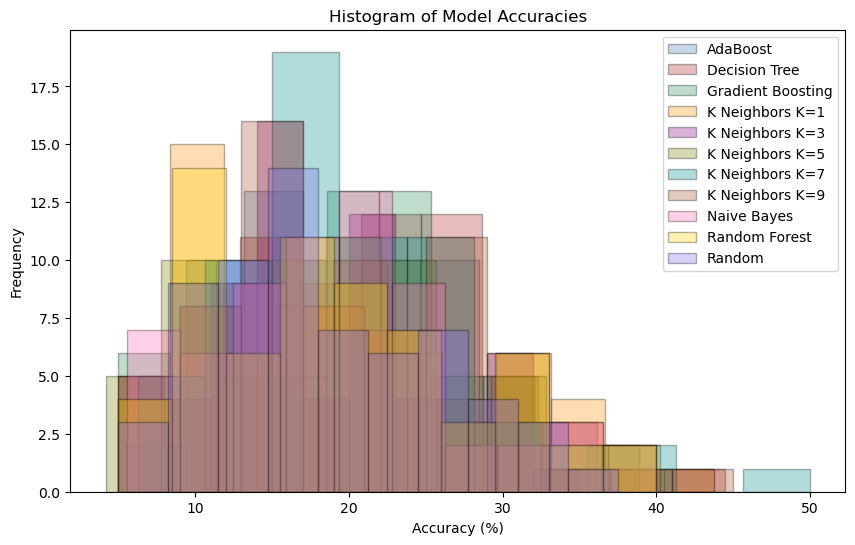

In [11]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Define a list of colors for visualization
colors = ['steelblue', 'firebrick', 'seagreen', 'darkorange', 'purple', 'olive', 'darkcyan', 'sienna', 'hotpink', 'gold', 'mediumslateblue']

# Plot histogram for each model
for (model_name, df), color in zip(dataframes.items(), colors):
    plt.hist(df['Accuracy'], bins=10, edgecolor='black', alpha=0.3, label=model_name, color=color)

# Set title and labels
plt.title('Histogram of Model Accuracies')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()


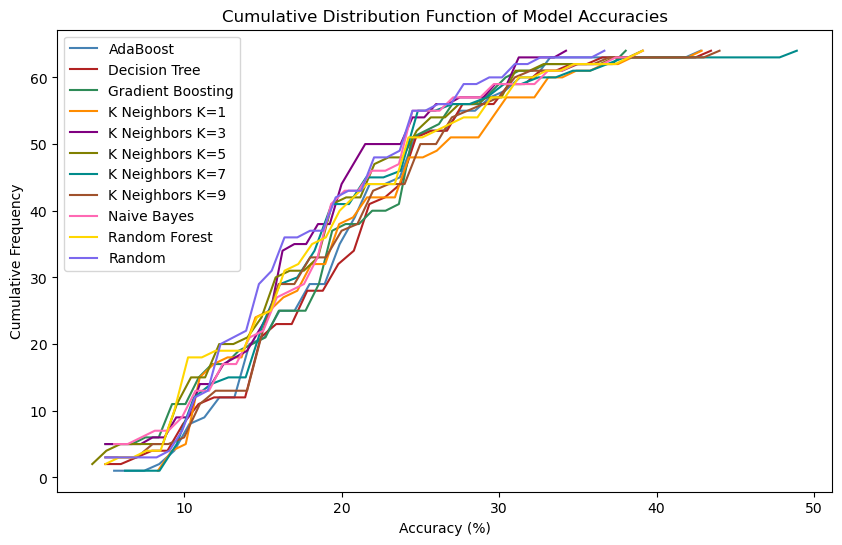

In [12]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Define a list of colors for visualization
colors = ['steelblue', 'firebrick', 'seagreen', 'darkorange', 'purple', 'olive', 'darkcyan', 'sienna', 'hotpink', 'gold', 'mediumslateblue']

# Compute CDF for each model
for (model_name, df), color in zip(dataframes.items(), colors):
    values, base = np.histogram(df['Accuracy'], bins=40)
    cumulative = np.cumsum(values)
    plt.plot(base[:-1], cumulative, c=color, label=model_name)

plt.title('Cumulative Distribution Function of Model Accuracies')
plt.xlabel('Accuracy (%)')
plt.ylabel('Cumulative Frequency')
plt.legend() # To distinguish between different lines in the plot
plt.show()

